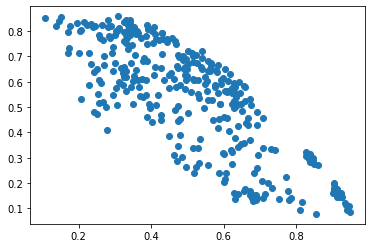

In [1]:
import numpy as np
leaf =np.loadtxt('/home/marianne/Downloads/leaf.csv', delimiter=',')
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(leaf[:,4],leaf[:,7])
plt.show()

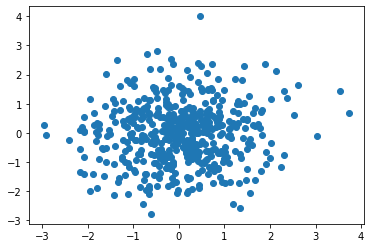

In [2]:
rndn = np.random.randn(500,2)
fig, ax = plt.subplots()
ax.scatter(rndn[:,0],rndn[:,1])
plt.show()

# Import of iris dataset

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [3]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [4]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Separate explicative variables from target

In [5]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values

# Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

PCA with Python 

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)


In [8]:
principalDf = pd.DataFrame(data =principalComponents, columns = ['principal component1', 'principal component 2'])

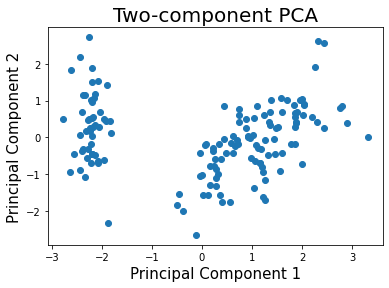

In [9]:
fig, ax = plt.subplots()
ax.scatter(principalComponents[:,0],principalComponents[:,1])
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two-component PCA', fontsize = 20)
plt.show()

In [10]:
finalDf = pd.concat([principalDf, df[['target']]],axis = 1)
targets = ['Iris-setosa', 'Iris-versicolor','Iris-virginica']

Text(0.5, 1.0, 'Two-component PCA')

<Figure size 576x576 with 0 Axes>

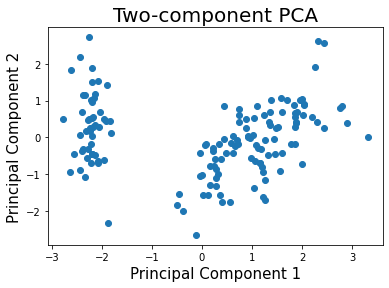

In [11]:
fig = plt.figure(figsize = (8,8))
fig, ax = plt.subplots()
ax.scatter(principalComponents[:,0],principalComponents[:,1])
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two-component PCA', fontsize = 20)

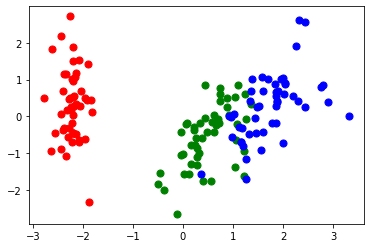

In [29]:
fig, ax = plt.subplots()
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    x=finalDf[indicesToKeep]['principal component1'].to_numpy()
    y=finalDf[indicesToKeep]['principal component 2'].to_numpy()
    ax.scatter(x, y, c = color, s = 50)
